<a href="https://colab.research.google.com/github/erzar0/engineering-thesis/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

# npz = np.load('/content/drive/MyDrive/thesis/Gasecki/Gasecki_data_corr_total.npz', allow_pickle=True)
# gasecki_e_xy = npz["E_xy"]

npz = np.load('/content/drive/MyDrive/thesis/Sobieski/Sobieski_data_corr_total.npz', allow_pickle=True)
sobieski_e_xy = npz["E_xy"]

# npz = np.load('/content/drive/MyDrive/thesis/Matka_Boska/Matka_Boska_data_corr_total_Cu.npz', allow_pickle=True)
# matka_boska_e_xy = npz["E_xy"]

npz = np.load('/content/drive/MyDrive/thesis/Blank_PcbCu/GEM_Cr_PBS1_Blank_PcbCu_ArCO2_75_25_Gain_35_Thr_35_HV_3640_Xray_50kV_04mA_part_001_GainCorr.pcap.dat.npz', allow_pickle=True)
copper_plate_e_xy = npz["E_xy"]

In [ ]:
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
def map_energy(e_xy, peaks, energies, energy_range=(0, 30), target_length=4096):
    spectrum_acc = np.sum(e_xy, (0,1), dtype=np.uint32)

    coeff_corr = np.polyfit(peaks, energies, 1)
    fit_func_corr = np.poly1d(coeff_corr)
    channel_energies = fit_func_corr(np.arange(len(spectrum_acc)))

    mask = (channel_energies >= energy_range[0]) & (channel_energies <= energy_range[1])

    max_channel_energy = channel_energies[-1]

    channel_energies_map = channel_energies[mask]
    spectrum_acc_map = spectrum_acc[mask]
    e_xy_map = e_xy[:, :, mask]

    # e_xy_map_interpolated= np.interp(np.linspace(0, 1, target_length), np.linspace(0, 1, len(e_xy_map.shape[-1])), e_xy_map[])
    # e_xy_map_interpolated= np.interp(np.linspace(0, 1, target_length), np.linspace(0, 1, len(e_xy_map.shape[-1])), e_xy_map)

    if max_channel_energy >= energy_range[1]:
        def _interpolate_along_axis(arr, new_length, axis_to_interpolate):
            return np.interp(np.linspace(0, 1, new_length), np.linspace(0, 1, arr.shape[axis_to_interpolate]), arr, axis=axis_to_interpolate)

        e_xy_map = interp1d(np.linspace(0, 1, e_xy_map.shape[-1]), e_xy_map, 2)

        # def exponential_function(x, a, b):
        #     return a * np.exp(b * x)

        # # Fit the exponential function to the data
        # x = np.linspace(channel_energies_map, energy_range[-1], 100)
        # params, covariance = curve_fit(exponential_function, x, spectrum_acc_map[:100])

        # x_extrapolate = np.linspace(max_channel_energy, energy_range[1], target_length - len(spectrum_acc_map))

        # # Use the fitted function to extrapolate
        # y_extrapolate = exponential_function(x_extrapolate, *params)

        # # Plot the original data, fitted curve, and extrapolation
        # plt.scatter(x, spectrum_acc_map, label='Original data')
        # plt.plot(x, exponential_function(x, *params), label='Fitted curve')
        # plt.scatter(x_extrapolate, y_extrapolate, label='Extrapolation', color='red')
        # plt.legend()
        # # plt.yscale("log")
        # plt.show()

    return e_xy_map, channel_energies_map, spectrum_acc_map

peaks_sobieski = [817, 1016,1347, 1598]
energies_sobieski = [6.405, 8.046, 10.551, 12.614]
sobieski_e_xy_map, channel_energies_map, spectrum_acc_map = map_energy(sobieski_e_xy, peaks_sobieski, energies_sobieski)

# peaks_copper_plate = [720, 985, 1594, 2068]
# energies_copper_plate = [3.692, 5.088, 8.046, 10.551]

# e_xy_map, channel_energies_map, spectrum_acc_map = map_energy(copper_plate_e_xy, peaks_copper_plate, energies_copper_plate)

plt.plot(np.linspace(0, 30, len(spectrum_acc_map)), spectrum_acc_map / np.max(spectrum_acc_map), label="energy mapped")
plt.plot(np.linspace(0, 30, len(np.sum(sobieski_e_xy, (0,1)))), np.sum(sobieski_e_xy, (0,1)), label="energy unmapped")
plt.legend()

NameError: ignored

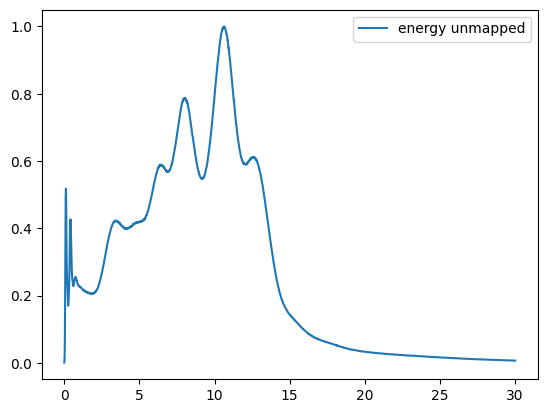

In [ ]:

import matplotlib.pyplot as plt
# sobieski_e_xy = sobieski_e_xy_map(np.linspace(0, 1, 4096))

# plt.plot(np.linspace(0, 30, len(spectrum_acc_map)), spectrum_acc_map / np.max(spectrum_acc_map), label="energy mapped")
plt.plot(np.linspace(0, 30, len(np.sum(sobieski_e_xy, (0,1)))), np.sum(sobieski_e_xy, (0,1)) / np.max(np.sum(sobieski_e_xy, (0, 1))), label="energy unmapped")
plt.legend()

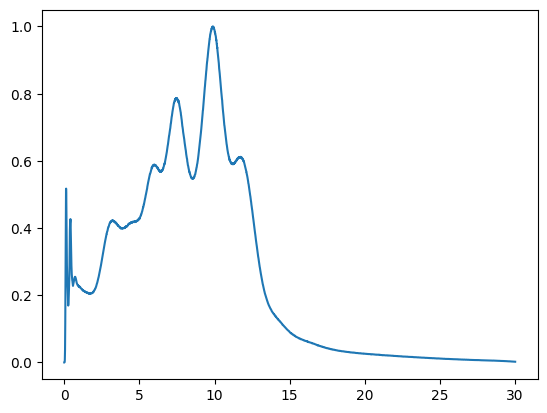

In [ ]:

plt.plot(np.linspace(0, 30, len(np.sum(sobieski_e_xy, (0,1)))), np.sum(sobieski_e_xy, (0,1)) / np.max(np.sum(sobieski_e_xy, (0, 1))), label="energy unmapped")

ValueError: ignored

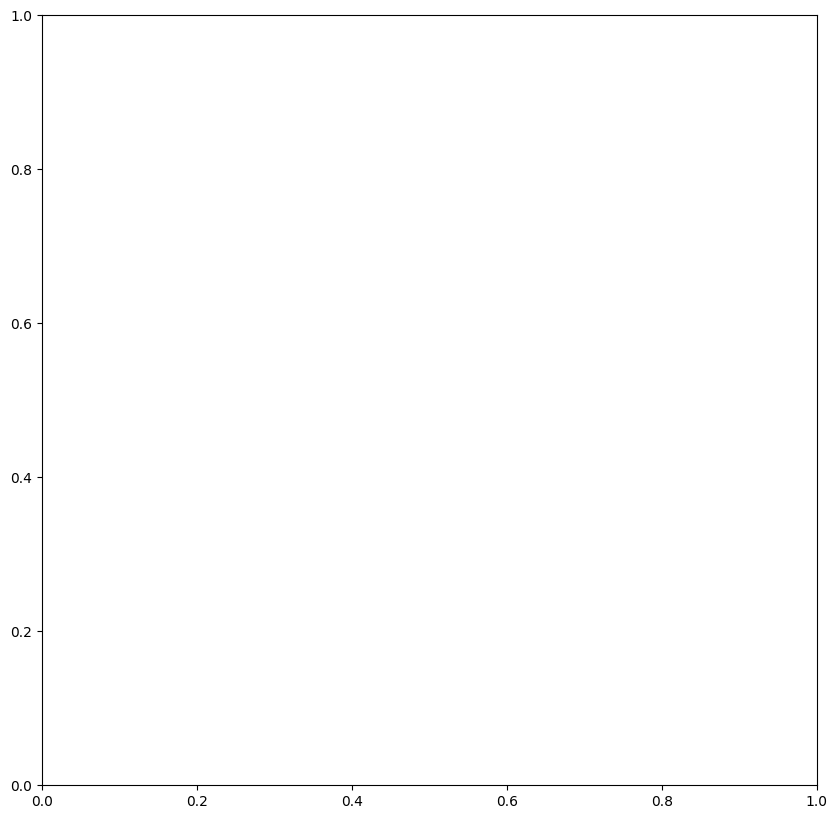

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(X,y / np.max(y))
plt.plot(X, np.sum(sobieski_e_xy, (0, 1)) / np.max(np.sum(sobieski_e_xy, (0, 1))))

"Copper plate" mean photon count: 424.95355224609375
"Copper plate" standard deviation of photon count: 143.14790594655412


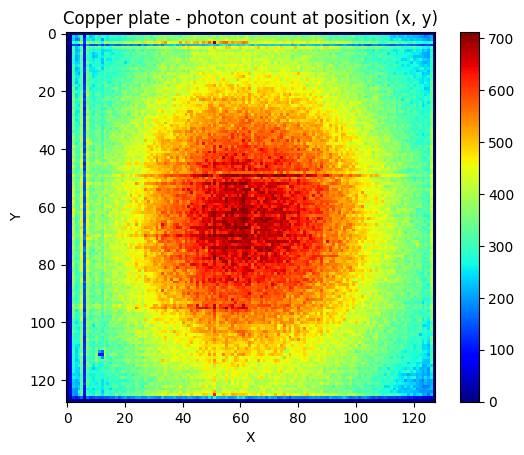

"Sobieski" mean photon count: 22649.877233587584
"Sobieski" standard deviation of photon count: 3373.4751935949807


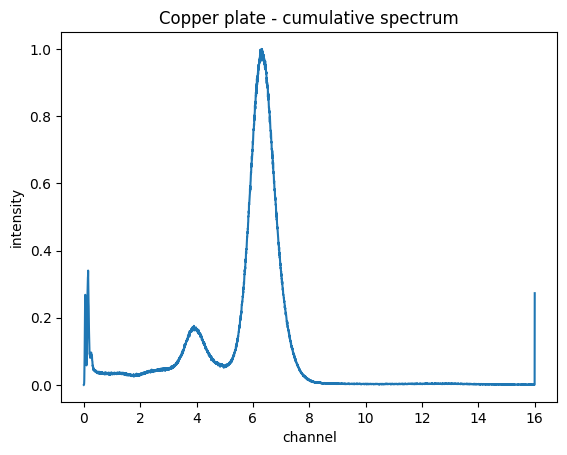

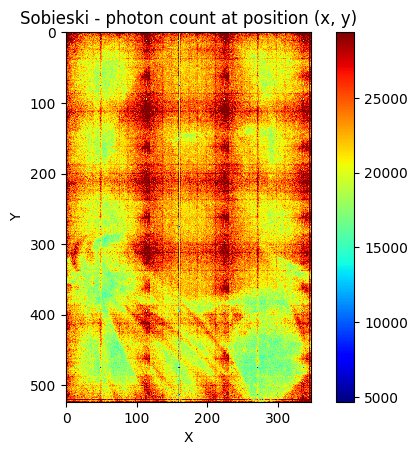

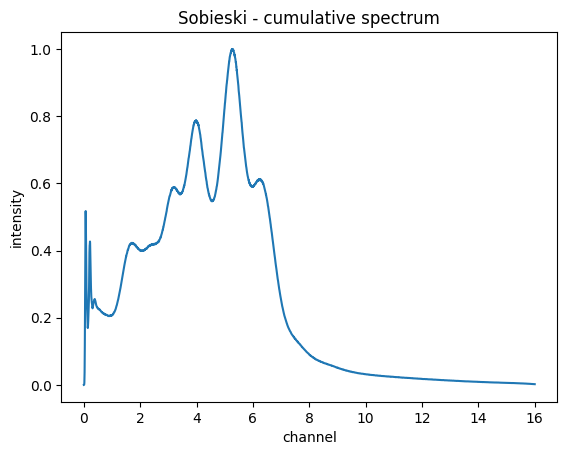

In [ ]:
import matplotlib.pyplot as plt
import random
from scipy.ndimage import gaussian_filter

def show_stats(measurement, name=None):
    measurement_photon_count = np.sum(measurement, axis=-1)

    mu = np.mean(measurement_photon_count)
    sigma = np.var(measurement_photon_count)**0.5
    print(f"\"{name}\" mean photon count: {mu}")
    print(f"\"{name}\" standard deviation of photon count: {sigma}")

    plt.figure(random.randint(1, 10e10))
    plt.imshow(measurement_photon_count, cmap='jet', interpolation='nearest', vmax=mu + 2 * sigma)
    plt.colorbar()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"{name} - photon count at position (x, y)")
    plt.show()

    cumulative_spectrum = np.sum(measurement, (0, 1))
    cumulative_spectrum = cumulative_spectrum / np.max(cumulative_spectrum)
    plt.figure(random.randint(1, 10e10))
    plt.xlabel("channel")
    plt.ylabel("intensity")
    plt.title(f"{name} - cumulative spectrum")
    plt.plot(np.linspace(0, 16, measurement.shape[-1]), cumulative_spectrum)

show_stats(copper_plate_e_xy, name="Copper plate")
# show_stats(gasecki_e_xy, name="Gąsecki")
show_stats(sobieski_e_xy, name="Sobieski")
# show_stats(matka_boska_e_xy, name="Matka Boska")

0.960477642600464 11.891788830989356 0.6016726366135688
0.624873866653596


8.503354916285307

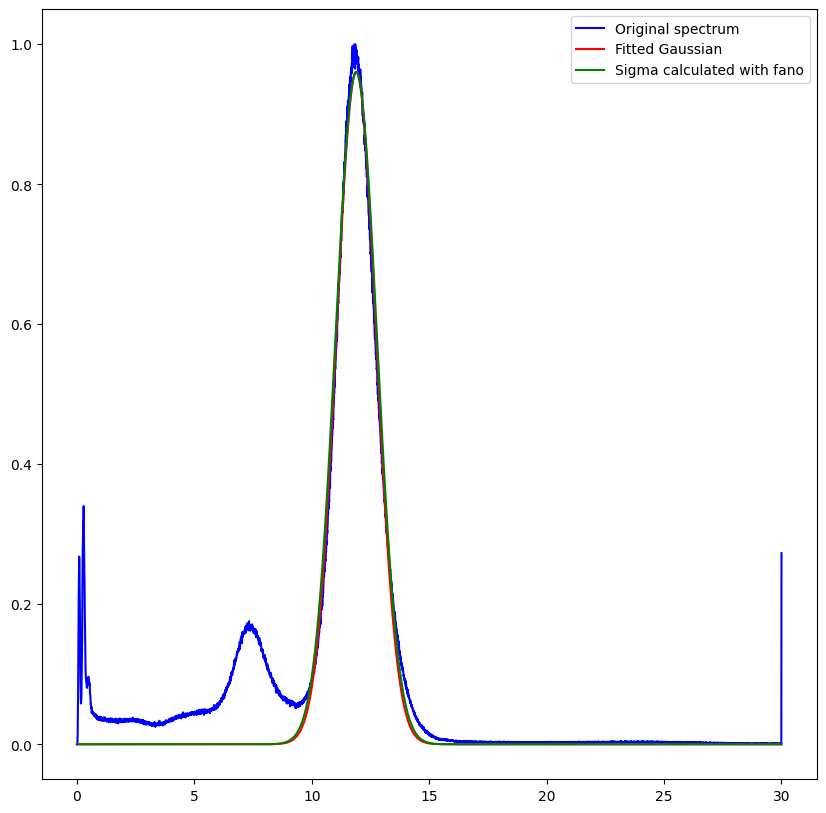

In [ ]:
from scipy.optimize import curve_fit

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / (2 * stddev))**2)

def calculate_fano_factor(fwhm, average_energy):
    fano_factor = (2.354**2 * fwhm**2) / average_energy
    return fano_factor



def calculate_fano(spectrum):
    x_values = np.linspace(0, 30, len(spectrum))
    # initial_guess = [max(spectrum), np.argmax(spectrum), 1.0]
    (amplitude_opt, mean_opt, stddev_opt), _ = curve_fit(gaussian, x_values, spectrum)

    fitted_curve = gaussian(x_values, amplitude_opt, mean_opt, stddev_opt)

    fwhm = 2.354 * stddev_opt
    fano = ( fwhm**2 ) / (mean_opt * 2.354**2 * 0.00358 )
    sigma_calculated_with_fano = np.sqrt((0.08/2.354)**2 + 0.00385 * fano * mean_opt)

    plt.figure(figsize=(10, 10))
    plt.plot(x_values, spectrum, label='Original spectrum', color='blue')
    plt.plot(x_values, fitted_curve, label='Fitted Gaussian', color='red')
    plt.plot(x_values, gaussian(x_values, amplitude_opt, mean_opt, sigma_calculated_with_fano), label="Sigma calculated with fano", color="green")
    print(amplitude_opt, mean_opt, stddev_opt)
    print(sigma_calculated_with_fano)

    plt.legend()

    return fano


cumulative_spectrum = np.sum(copper_plate_e_xy, (0, 1))
cumulative_spectrum = cumulative_spectrum / np.max(cumulative_spectrum)
calculate_fano(cumulative_spectrum)

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

class SelfOrganizingMap:
    def __init__(self, input_size, map_size, learning_rate=0.1, sigma=1.0):
        self.input_size = input_size
        self.map_size = map_size
        self.learning_rate = learning_rate
        self.sigma = sigma

        self.weights = np.random.rand(map_size[0], map_size[1], input_size)

    def calculate_distance(self, input_vector, weights):
        return np.linalg.norm(input_vector - weights, )

    def find_best_matching_unit(self, input_vector):
        distances = np.zeros((self.map_size[0], self.map_size[1]))
        for i in range(self.map_size[0]):
            for j in range(self.map_size[1]):
                distances[i, j] = self.calculate_distance(input_vector, self.weights[i, j])
        bmu_coords = np.unravel_index(np.argmin(distances), distances.shape)
        return bmu_coords

    def update_weights(self, input_vector, bmu_coords, iteration):
        decay_factor = np.exp(-iteration / self.sigma)
        for i in range(self.map_size[0]):
            for j in range(self.map_size[1]):
                influence = np.exp(-((i - bmu_coords[0])**2 + (j - bmu_coords[1])**2) / (2 * (self.sigma**2)))
                update = self.learning_rate * decay_factor * influence * (input_vector - self.weights[i, j])
                self.weights[i, j] += update

    def train(self, data, epochs):
        for epoch in tqdm(range(epochs)):
            for input_vector in data:
                bmu_coords = self.find_best_matching_unit(input_vector)
                self.update_weights(input_vector, bmu_coords, epoch)

In [ ]:
def get_clustered_labels(e_xy, epochs=10, map_size=(3,3), learning_rate=0.1, sigma=0.5):
    e_xy_flat= e_xy.reshape(-1, e_xy.shape[-1])
    e_xy_max_channel_counts = np.max(np.abs(e_xy_flat), axis=1, keepdims=True)
    e_xy_flat_normalized = e_xy_flat/ e_xy_max_channel_counts
    som = SelfOrganizingMap(input_size=e_xy.shape[-1], map_size=map_size, learning_rate=learning_rate, sigma=sigma)
    som.train(e_xy_flat_normalized, epochs)
    bmus = [[som.find_best_matching_unit(e_xy_flat_normalized[i * e_xy.shape[1] + j]) for j in range(e_xy.shape[1])] for i in range(e_xy.shape[0])]
    labels = [[bmu[0] * map_size[1] + bmu[1] for bmu in bmus_row] for bmus_row in bmus]
    return labels



100%|██████████| 10/10 [06:29<00:00, 38.93s/it]


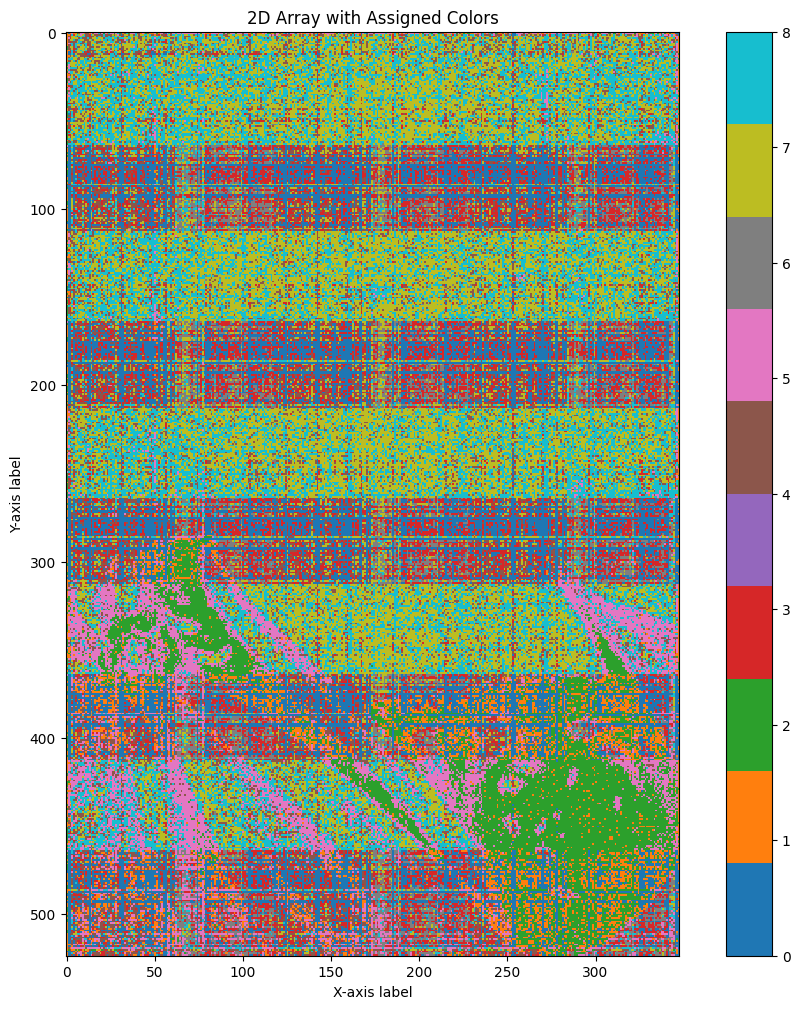

In [ ]:
labels = get_clustered_labels(sobieski_e_xy)

plt.figure(figsize=(12,12))
plt.imshow(labels, cmap="tab10", interpolation='nearest')

plt.colorbar()
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('2D Array with Assigned Colors')

plt.show()

In [ ]:
def get_measurement_mask(measurement, labels, label):
    masked_image = np.zeros(measurement.shape[:-1])
    masked_image[np.array(labels).reshape(measurement.shape[:-1]) == label] = 1
    return masked_image

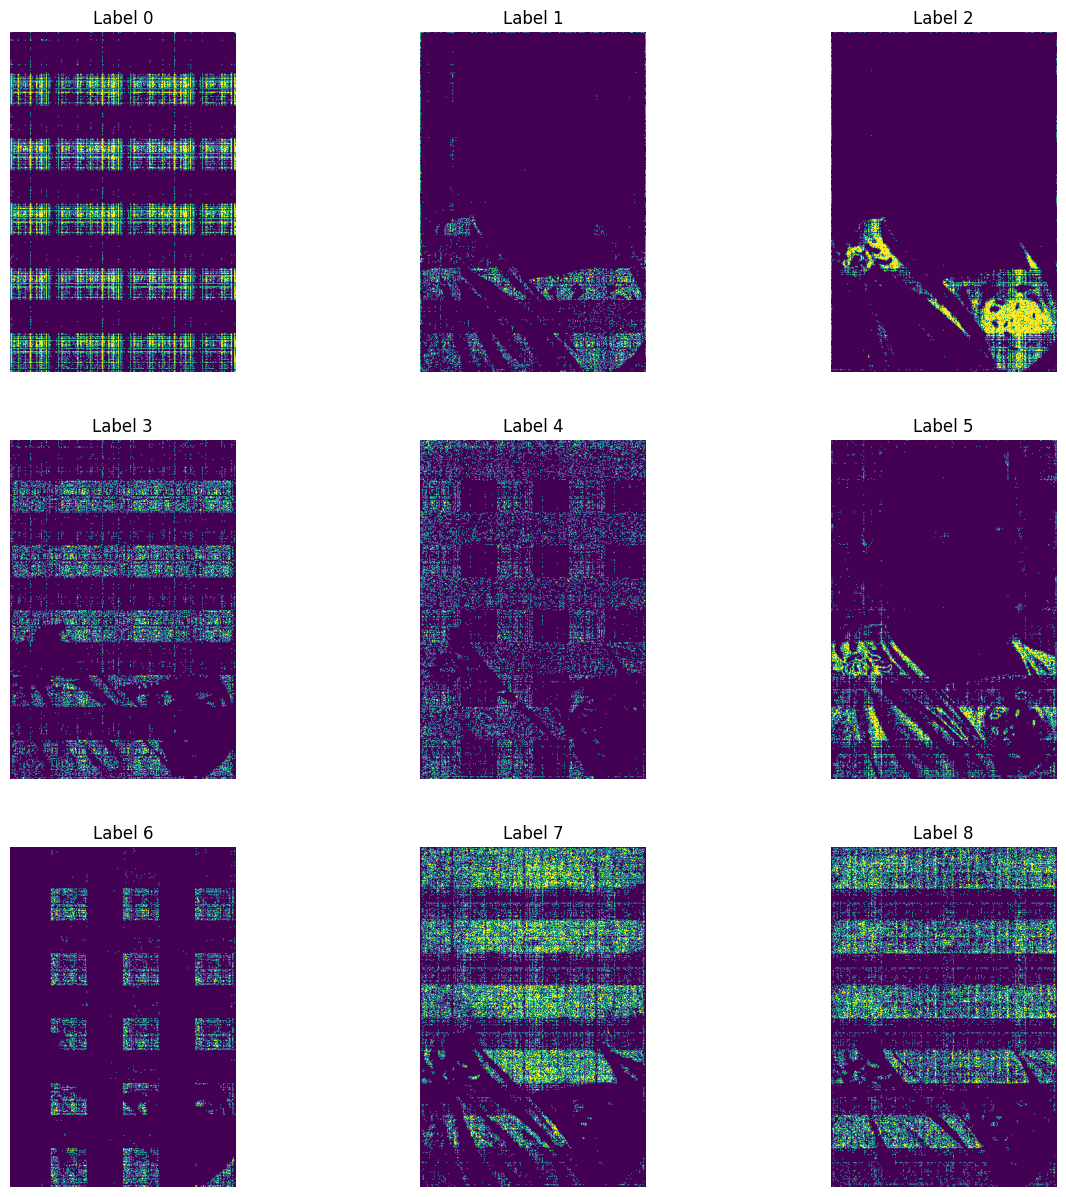

In [ ]:
unique_labels = np.unique(labels)
num_labels = len(unique_labels)
grid_size = int(np.ceil(np.sqrt(num_labels)))

fig, ax = plt.subplots(grid_size, grid_size, figsize=(15, 15))

for i in range(grid_size):
    for j in range(grid_size):
        if i * grid_size + j < num_labels:
            ax[i][j].imshow(get_measurement_mask(sobieski_e_xy, labels, unique_labels[i * grid_size + j]), cmap='viridis')
            ax[i][j].set_title(f'Label {unique_labels[i * grid_size + j]}')
            ax[i][j].axis('off')

plt.show()

In [ ]:
!pip install hdbscan
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 39.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039162 sha256=7c0b8899bee9451a9758ce9436403ec572d608f85106371bc71075166cfbe326
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.5
    Uninstalling Cython-3.0.5:
      Successfully uninstalled Cython-3.0.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.3 MB/s eta 0:00:00
  Created wh

In [ ]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import gc
gc.collect()

sobieski_e_xy_flat= sobieski_e_xy.reshape(-1, sobieski_e_xy.shape[-1])
sobieski_e_xy_max_channel_counts = np.max(np.abs(sobieski_e_xy_flat), axis=1, keepdims=True)
sobieski_e_xy_flat_normalized = sobieski_e_xy_flat/ sobieski_e_xy_max_channel_counts

clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    n_components=2,
).fit_transform(sobieski_e_xy_flat_normalized)

In [ ]:
import hdbscan
# clusterable_embedding = clusterable_embedding.reshape(*sobieski_e_xy.shape[:-1], 3)
# clusterable_embedding / np.max(clusterable_embedding, (2), keepdims=True)

clusterable_embedding = clusterable_embedding.reshape(sobieski_e_xy_flat.shape[0], 2)
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=100,
).fit_predict(clusterable_embedding)

[-1  0  1  2  3]


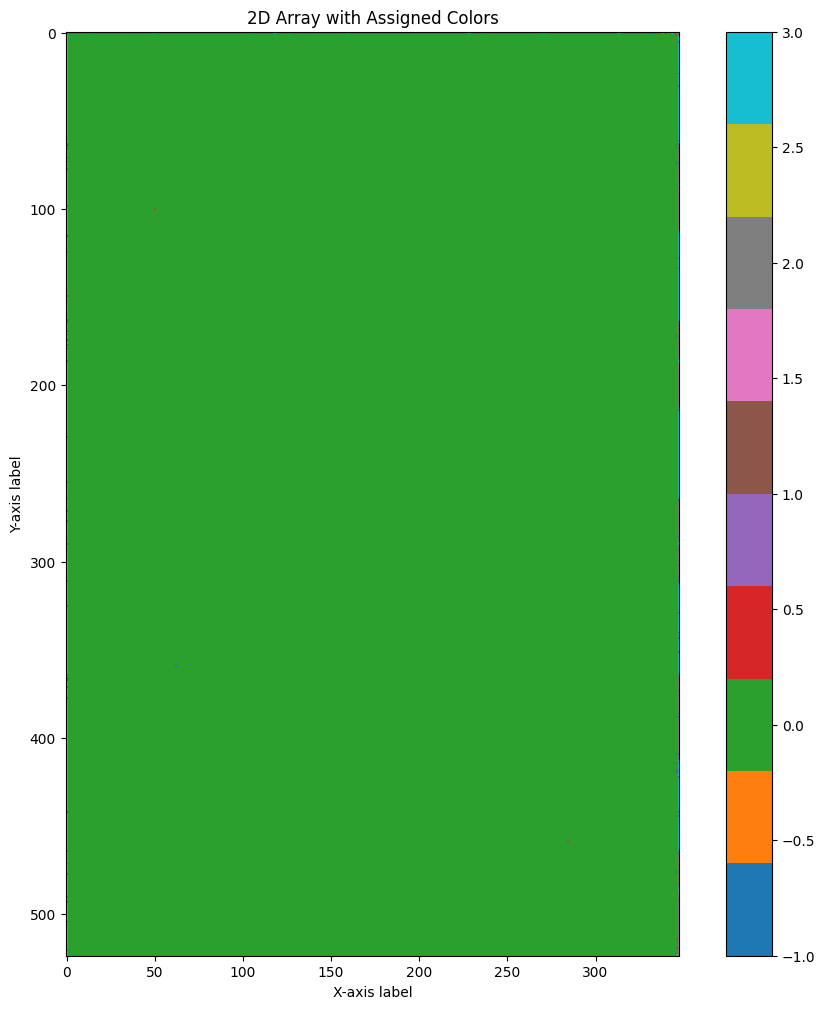

In [ ]:
plt.figure(figsize=(12,12))

plt.imshow(labels.reshape(*sobieski_e_xy.shape[:-1]), cmap="tab10", interpolation="nearest")

plt.colorbar()
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('2D Array with Assigned Colors')
print(np.unique(labels))
plt.show()

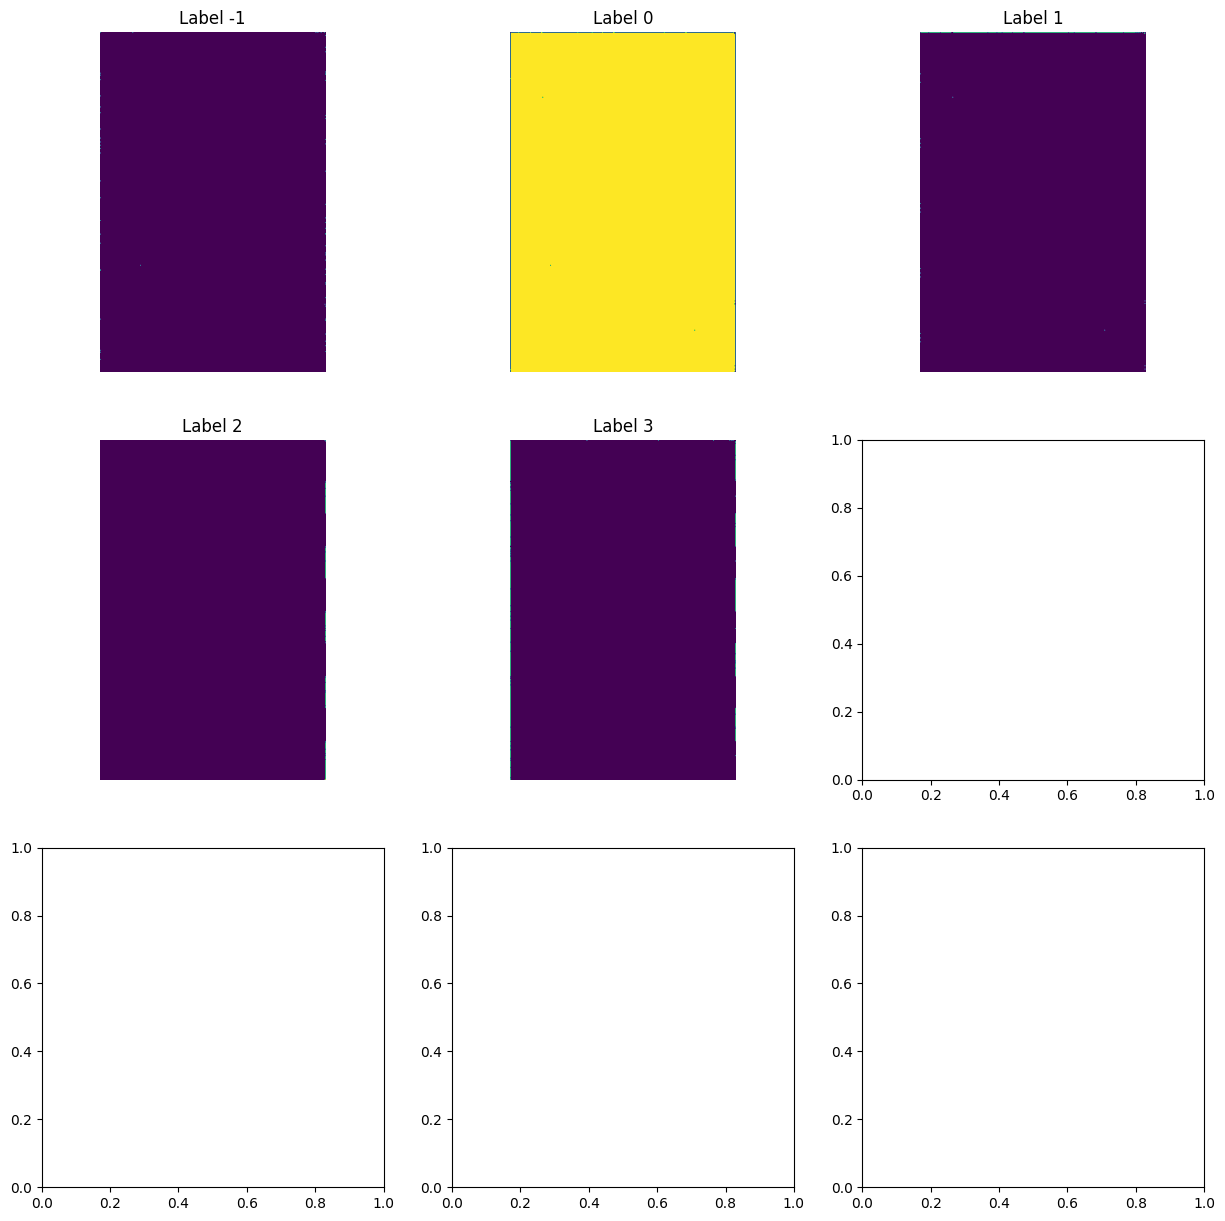

In [ ]:
unique_labels = np.unique(labels)
num_labels = len(unique_labels)
grid_size = int(np.ceil(np.sqrt(num_labels)))

fig, ax = plt.subplots(grid_size, grid_size, figsize=(15, 15))

for i in range(grid_size):
    for j in range(grid_size):
        if i * grid_size + j < num_labels:
            ax[i][j].imshow(get_measurement_mask(sobieski_e_xy, labels, unique_labels[i * grid_size + j]), cmap='viridis')
            ax[i][j].set_title(f'Label {unique_labels[i * grid_size + j]}')
            ax[i][j].axis('off')

plt.show()

In [ ]:
pixels_by_label = [np.zeros(len(labels)) for i in range(len(labels))]
for i in range(len(labels)):
    pixels_by_label[labels[i]] = 1